In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Sample_Superstore.csv")

df["Order Date"] = pd.to_datetime(df["Order Date"], format='mixed', dayfirst=False)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#Infos gerais

df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Ship Date     9994 non-null   object        
 4   Ship Mode     9994 non-null   object        
 5   Customer ID   9994 non-null   object        
 6   Segment       9994 non-null   object        
 7   Country       9994 non-null   object        
 8   City          9994 non-null   object        
 9   State         9994 non-null   object        
 10  Region        9994 non-null   object        
 11  Product ID    9994 non-null   object        
 12  Category      9994 non-null   object        
 13  Sub-Category  9994 non-null   object        
 14  Product Name  9994 non-null   object        
 15  Sales         9994 non-null   float64 

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Segment,0
Country,0
City,0
State,0


In [ ]:
#Receita/Lucro total e Margem geral

receita_total = df["Sales"].sum()
lucro_total = df["Profit"].sum()

margem = lucro_total / receita_total

receita_total, lucro_total, margem


(np.float64(2297200.8603000003),
 np.float64(286397.0217),
 np.float64(0.12467217240315603))

In [ ]:
#Receita por região

df.groupby("Region")["Sales"].sum().sort_values(ascending=False)


,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


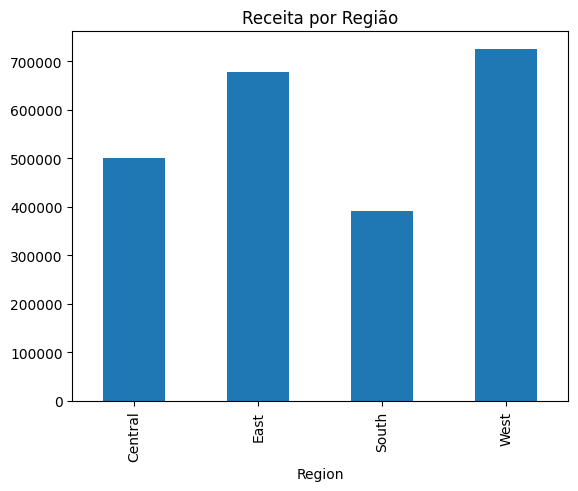

In [ ]:
#Visualização receita por região

df.groupby("Region")["Sales"].sum().plot(kind="bar")
plt.title("Receita por Região")
plt.show()


In [ ]:
#Categorias mais lucrativas

df.groupby("Category")["Profit"].sum().sort_values(ascending=False)

,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


In [ ]:
#Sub-Categorias mais lucrativas

df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).head(10)



,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


In [ ]:
#Média de lucro por faixa de desconto

df.groupby("Discount")["Profit"].mean().sort_index()

,Profit
Discount,
0.00,66.900292
0.10,96.055074
0.15,27.288298
0.20,24.702572
0.30,-45.679636
0.32,-88.560656
0.40,-111.927429
0.45,-226.646464
0.50,-310.703456


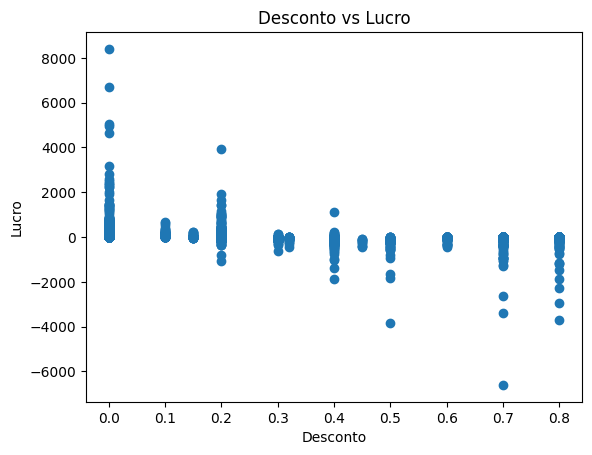

In [ ]:
#Impacto do desconto no lucro

plt.scatter(df["Discount"], df["Profit"])
plt.title("Desconto vs Lucro")
plt.xlabel("Desconto")
plt.ylabel("Lucro")
plt.show()

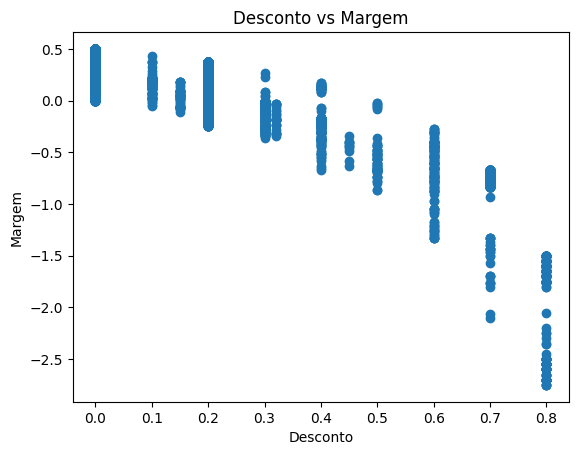

In [ ]:
#Impacto do desconto na margem

df["Margem"] = df["Profit"] / df["Sales"]

plt.scatter(df["Discount"], df["Margem"])
plt.title("Desconto vs Margem")
plt.xlabel("Desconto")
plt.ylabel("Margem")
plt.show()


In [ ]:
#Ticket médio

ticket_medio = df["Sales"].mean()
ticket_medio


np.float64(229.85800083049833)

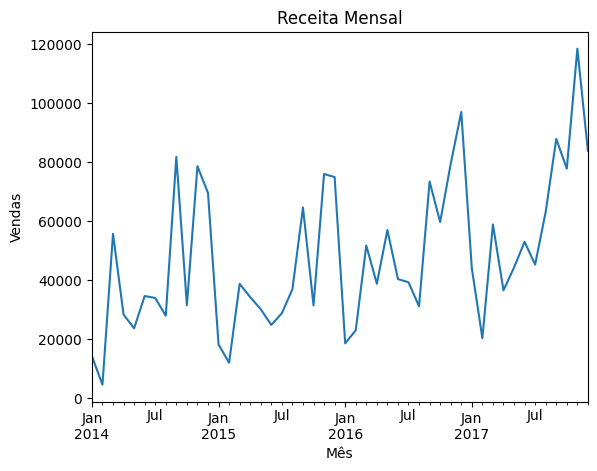

In [ ]:
#Crescimento mensal

vendas_mensais = df.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum()

vendas_mensais.plot()
plt.title("Receita Mensal")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.show()


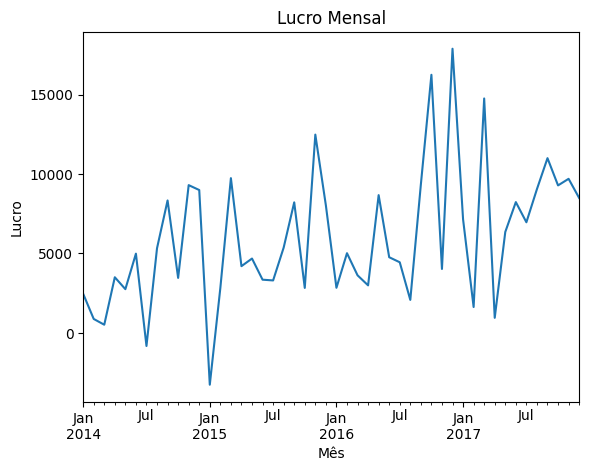

In [ ]:
#Lucro mensal

lucro_mensal = df.groupby(df["Order Date"].dt.to_period("M"))["Profit"].sum()

lucro_mensal.plot()
plt.title("Lucro Mensal")
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.show()


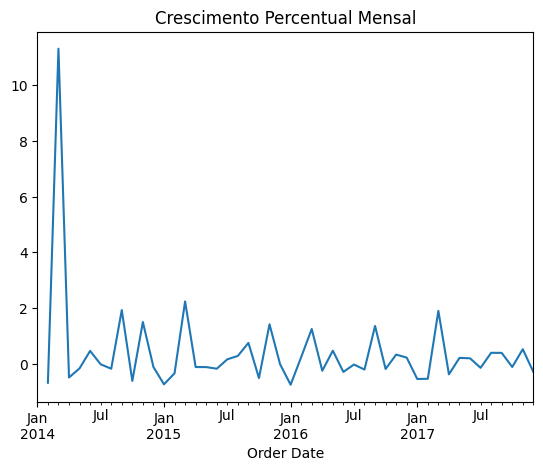

In [ ]:
#Crescimento percentual mensal

crescimento_mensal = vendas_mensais.pct_change()

crescimento_mensal.plot()
plt.title("Crescimento Percentual Mensal")
plt.show()


In [79]:
df.to_csv("dados_vendas.csv", index=False)